# Warhol效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [8]:

def getLUT(fg_temp = 0,skin_temp = 128,bg_temp = 255):
    lut = []
    for i in range(256):
        if i < 86:
            lut.append(fg_temp)
        elif 86 < i < 172:
            lut.append(skin_temp)
        else:
            lut.append(bg_temp)
    return np.array(lut)

In [26]:
def warhol(src,colorset={'bg': (255, 255, 0), 'fg': (50, 9, 125), 'skin': (118,192, 0)},
           fg_temp = 0,skin_temp = 128,bg_temp = 255):
    lut = getLUT()
    dst = np.zeros_like(src)
    dst = lut[src]
    res = np.zeros_like(dst)
    rows,cols = src.shape[0],src.shape[1]
    dst_r = dst[:,:,0]
    dst_g = dst[:,:,1]
    dst_b = dst[:,:,2]
    
    idx = (dst_r == fg_temp) & (dst_g == fg_temp) & (dst_b == fg_temp)
    res[idx] = colorset['fg']
    idx = (dst_r == bg_temp) & (dst_g == bg_temp) & (dst_b == bg_temp)
    res[idx] = colorset['bg']
    idx = (dst_r == skin_temp) & (dst_g == skin_temp) & (dst_b == skin_temp)
    res[idx] = colorset['skin']
    return np.uint8(res)

In [29]:
colorsets= [
    {'bg': (255, 255, 0), 'fg': (50, 9, 125), 'skin': (118,192, 0)},
    {'bg': (0, 122, 240), 'fg': (255, 0, 112), 'skin': (255,255, 0)},
    {'bg': (50, 0, 130), 'fg': (255, 0, 0), 'skin': (243,145, 192)},
    {'bg': (255, 126, 0), 'fg': (134, 48, 149),'skin': (111,185, 248)},
    {'bg': (255, 0, 0), 'fg': (35, 35, 35,), 'skin': (255,255, 255)},
    {'bg': (122, 192, 0), 'fg': (255, 89, 0), 'skin': (250,255, 160)},
    {'bg': (0, 114, 100), 'fg': (252, 0, 116), 'skin': (250,250, 230)},
    {'bg': (250, 255, 0), 'fg': (254, 0, 0), 'skin': (139,198, 46)},
    {'bg': (253, 0, 118), 'fg': (51, 2, 126), 'skin': (255,105, 0)},
    ]

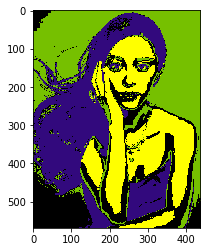

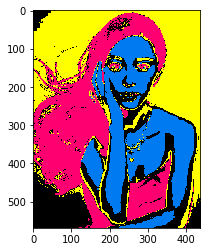

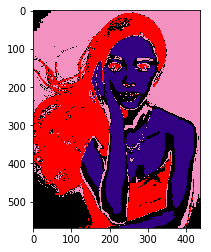

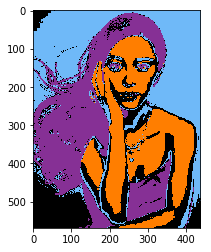

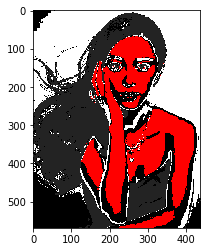

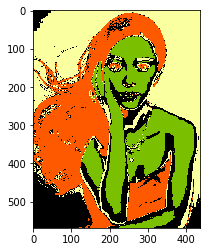

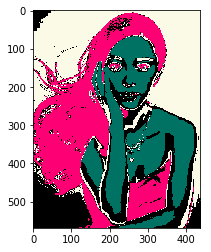

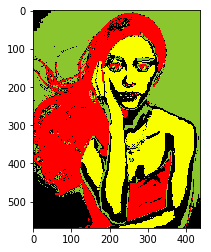

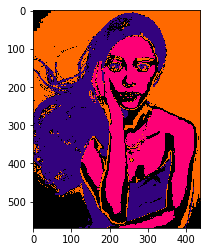

In [30]:
for colorset in colorsets:
    dst = warhol(rgb,colorset=colorset)
    plt.figure()
    plt.imshow(dst)